**About Dataset:**

16643 food images grouped in 11 major food categories

https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

Classes:


Bread

Dairy product

Dessert

Egg

Fried food

Meat

Noodles-Pasta

Rice

Seafood

Soup

Vegetable-Fruit

Getting Dataset from Kaggle

Follow this 
https://www.kaggle.com/general/74235

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aashidutt3","key":"552217ce2b82423aedad0bc90e9737ff"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3661        125  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11531       1494  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-05-31 07:20:57           3333         87  1.0              
muratkokludataset/rice-image-dataset         

In [8]:
!kaggle datasets download -d trolukovich/food11-image-dataset

 99% 1.07G/1.08G [00:06<00:00, 201MB/s]
100% 1.08G/1.08G [00:06<00:00, 180MB/s]


In [9]:
!unzip food11-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training/Soup/223.jpg   
  inflating: training/Soup/224.jpg   
  inflating: training/Soup/225.jpg   
  inflating: training/Soup/226.jpg   
  inflating: training/Soup/227.jpg   
  inflating: training/Soup/228.jpg   
  inflating: training/Soup/229.jpg   
  inflating: training/Soup/23.jpg    
  inflating: training/Soup/230.jpg   
  inflating: training/Soup/231.jpg   
  inflating: training/Soup/232.jpg   
  inflating: training/Soup/233.jpg   
  inflating: training/Soup/234.jpg   
  inflating: training/Soup/235.jpg   
  inflating: training/Soup/236.jpg   
  inflating: training/Soup/237.jpg   
  inflating: training/Soup/238.jpg   
  inflating: training/Soup/239.jpg   
  inflating: training/Soup/24.jpg    
  inflating: training/Soup/240.jpg   
  inflating: training/Soup/241.jpg   
  inflating: training/Soup/242.jpg   
  inflating: training/Soup/243.jpg   
  inflating: training/Soup/244.jpg   
  inflating: training/Soup/245.jpg   

In [1]:
# Train, test and validation set
traindir = '/content/training'
testdir = '/content/evaluation'
valdir = '/content/validation'

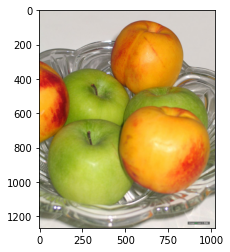

In [2]:
# Data analysis

import matplotlib.pyplot as plt
image = plt.imread('validation/Vegetable-Fruit/99.jpg')
plt.imshow(image)

In [12]:
#imports

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, AveragePooling2D, Flatten, Conv2D
from tensorflow.keras import Sequential

In [4]:
# Data prep
size = (224, 224)
batch_size = 32

train = tf.keras.preprocessing.image.ImageDataGenerator(   
    
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
)

train_generator = train.flow_from_directory(
    traindir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = True,
    seed = 42,
    class_mode = 'categorical'
)

Found 9866 images belonging to 11 classes.


In [5]:
val = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_generator = val.flow_from_directory(
    valdir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical'
)

Found 3430 images belonging to 11 classes.


In [6]:
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test.flow_from_directory(
    testdir,
    target_size = size,
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    class_mode = 'categorical'
)

Found 3347 images belonging to 11 classes.


In [7]:
labels = list(train_generator.class_indices.keys())
print(labels)

['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']


In [1]:
# Model
baseModel = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

NameError: ignored

In [14]:
num_classes = len(labels)

In [15]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [16]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (5,5))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation ='relu')(headModel)
headModel = Dropout(0.5)(headModel)

headModel = Dense(num_classes, activation = 'softmax')(headModel)
model = Model(inputs = baseModel.input, outputs = headModel)

for layer in baseModel.layers:
  layer.trainable= False


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics =['Accuracy'])

In [19]:
Epochs = 8
#step_size_train = train_generator.n // train_generator.batch_size
#step_size_test = test_generator.n // test_generator.batch_size
#step_size_val = val_generator.n // val_generator.batch_size

#History = model.fit(train_generator,steps_per_epoch=step_size_train, validation_data = val_generator,validation_steps = step_size_val, epochs = Epochs)
History = model.fit(train_generator, validation_data= val_generator, epochs = Epochs)

Epoch 1/8
309/309 [==============================] - 525s 2s/step - loss: 1.7390 - Accuracy: 0.4161 - val_loss: 1.0568 - val_Accuracy: 0.6694
Epoch 2/8
309/309 [==============================] - 513s 2s/step - loss: 1.2280 - Accuracy: 0.5883 - val_loss: 0.8777 - val_Accuracy: 0.7210
Epoch 3/8
309/309 [==============================] - 516s 2s/step - loss: 1.1039 - Accuracy: 0.6383 - val_loss: 0.8303 - val_Accuracy: 0.7353
Epoch 4/8
309/309 [==============================] - 514s 2s/step - loss: 1.0311 - Accuracy: 0.6556 - val_loss: 0.7800 - val_Accuracy: 0.7496
Epoch 5/8
309/309 [==============================] - 520s 2s/step - loss: 0.9819 - Accuracy: 0.6749 - val_loss: 0.7453 - val_Accuracy: 0.7586
Epoch 6/8
309/309 [==============================] - 515s 2s/step - loss: 0.9553 - Accuracy: 0.6848 - val_loss: 0.7357 - val_Accuracy: 0.7592
Epoch 7/8
309/309 [==============================] - 518s 2s/step - loss: 0.9089 - Accuracy: 0.7029 - val_loss: 0.7157 - val_Accuracy: 0.7729
Epoch 